<a href="https://colab.research.google.com/github/Sebukpor/monkeypox-classification/blob/main/Monkey_pox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
# Common


import numpy as np


# Data
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px

In [ ]:
from google.colab import files
import os

# Step 1: Upload the zip file
uploaded = files.upload()

Saving Original Images.zip to Original Images.zip


In [ ]:
import zipfile

# Path to the uploaded zip file
zip_file_path = '/content/Original Images.zip'  # Adjust the path if necessary

# Directory where the contents will be extracted
extract_to_path = '/content/Original Images'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Confirm the contents have been extracted
import os
extracted_files = os.listdir(extract_to_path)
extracted_files


['Original Images']

In [ ]:
image_height = 351
image_weight = 351
batch_size = 10

tpath ='/content/Original Images/Original Images'

In [ ]:
training_data = keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 8,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='training'

    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 8,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='validation'

    )

Found 228 files belonging to 2 classes.
Using 183 files for training.
Found 228 files belonging to 2 classes.
Using 45 files for validation.


In [ ]:
info_file = '/content/Monkeypox_Dataset_metadata.csv'
info = pd.read_csv(info_file)
info.head()
fig = px.pie(
    names=info.Label.unique(),
    values=info.Label.value_counts(),
    hole=0.2,
    width=500,
    height=500
)
fig.update_layout({'title':{'text':'Class Distribution','x':0.45}})
fig.show()

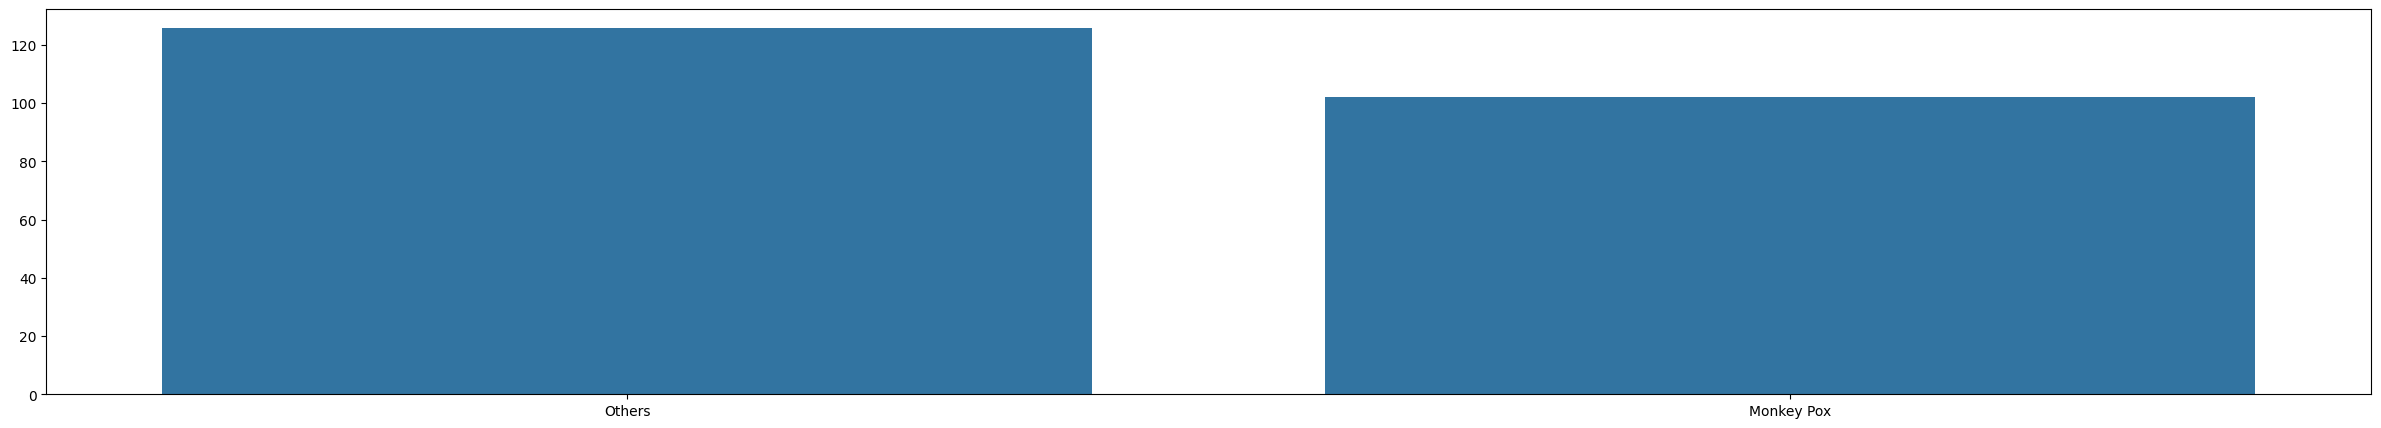

In [ ]:
class_names = []
class_count = []
train_examples = 0
for f in os.listdir(tpath):
  files = gb.glob(pathname=str(tpath + "//" + f + "/*"))
  class_names.append(f)
  class_count.append(len(files))
  train_examples += len(files)
plt.figure(figsize=(30,5))
sns.barplot(x=class_names, y=class_count)
plt.show()

Found 228 images belonging to 2 classes.


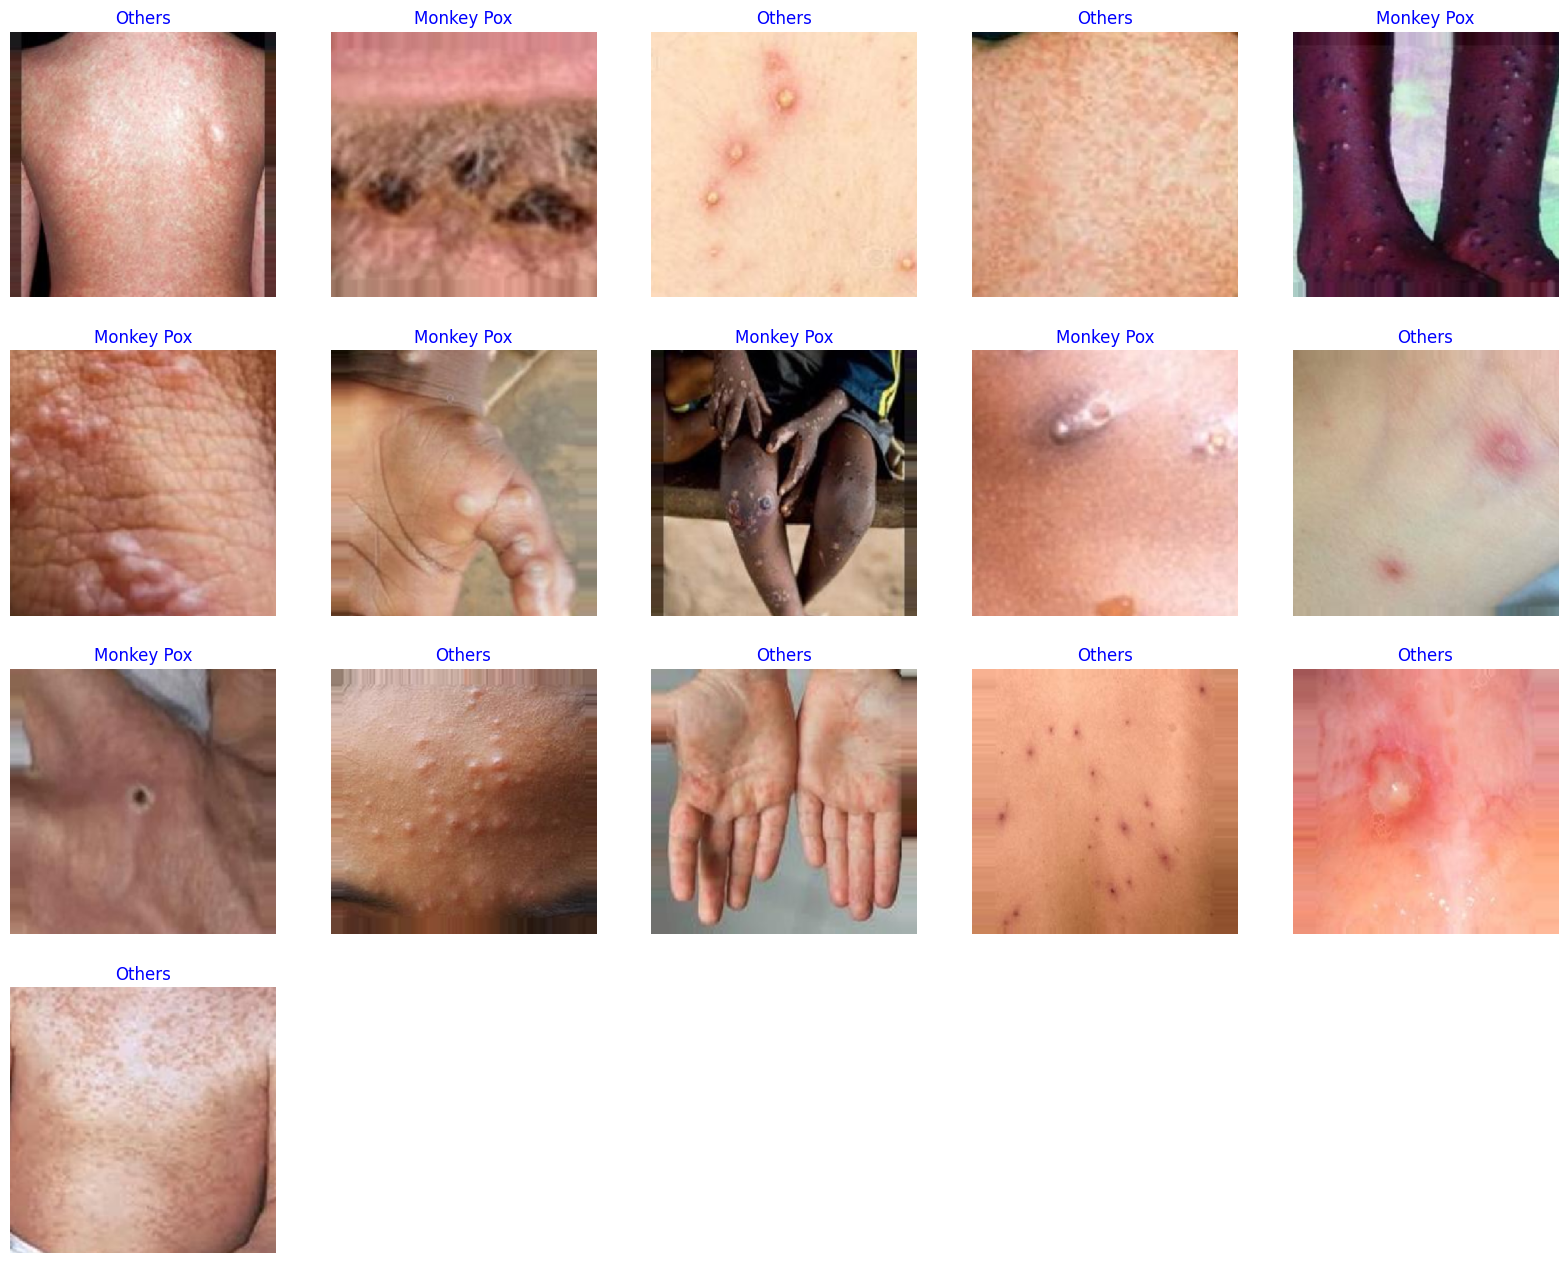

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_batch = train_gen.flow_from_directory(
    directory=tpath,
    target_size=(351,351),
    batch_size=16,
)
g_dict = train_batch.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_batch)      # get a batch size samples from the generator
# calculate number of displayed samples
length = len(labels)        # length of batch size
sample = min(length, 30)    # check if sample less than 25 images

plt.figure(figsize= (20, 20))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i]      # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
# Example for 3 classes
num_classes = 2  # Adjust this based on your actual number of classes

resnet_model = Sequential()

pretrained_model = keras.applications.ResNet50(
    include_top=False,
    input_shape=(300, 300, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_classes, activation='softmax'))  # Adjust the number of units here

# Compile the model
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=0.0009),
    metrics=['accuracy']
)


In [ ]:
epochs = 35
history = resnet_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=epochs
)

Epoch 1/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.4911 - loss: 0.7987 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 2/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.7048 - loss: 0.5598 - val_accuracy: 0.7778 - val_loss: 0.5005
Epoch 3/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7225 - loss: 0.5230 - val_accuracy: 0.7778 - val_loss: 0.4336
Epoch 4/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7782 - loss: 0.4801 - val_accuracy: 0.8222 - val_loss: 0.4110
Epoch 5/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8273 - loss: 0.4466 - val_accuracy: 0.8444 - val_loss: 0.4092
Epoch 6/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8355 - loss: 0.4351 - val_accuracy: 0.8667 - val_loss: 0.3850
Epoch 7/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.7714 - loss: 0.4332 - val_accuracy: 0.8889 - val_loss: 0.3761
Epoch 8/35
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8196 - loss: 0.4259 - val_accuracy: 0.8889 - val_loss:

In [ ]:
from tensorflow.keras import optimizers

# Compile the ResNet model
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=0.0009),
    metrics=['accuracy']
)


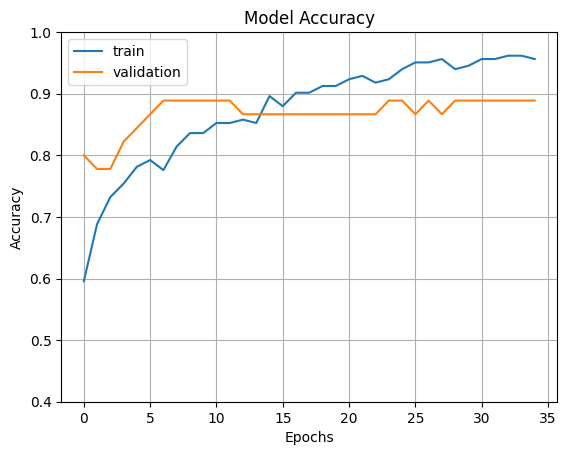

In [63]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [67]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/content/istockphoto-489634516-612x612.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['MonkeyPox','Other' ]
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Predicted Class name: Other


In [66]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/content/istockphoto-1399807208-612x612.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['MonkeyPox','Other' ]
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
Predicted Class name: MonkeyPox
